In [ ]:
import os
import glob
from PIL import Image
from tqdm import tqdm
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split

class Ultrasounddataset(Dataset):
    def __init__(self, root_dir_A, root_dir_B, transform=None, exts=("png","jpg","jpeg")):
        self.paths_A = sorted(sum((glob.glob(f"{root_dir_A}/**/*.{ext}", recursive=True) for ext in exts), []))
        self.paths_B = sorted(sum((glob.glob(f"{root_dir_B}/**/*.{ext}", recursive=True) for ext in exts), []))
        self.transform = transform

        self.map_A = {os.path.basename(p): p for p in self.paths_A}
        self.map_B = {os.path.basename(p): p for p in self.paths_B}

        self.common = sorted(set(self.map_A.keys()) & set(self.map_B.keys()))
        if len(self.common) == 0:
            raise ValueError(f"No matching filenames found between\n  {root_dir_A}\nand\n  {root_dir_B}")

    def __len__(self):
        return len(self.common)

    def __getitem__(self, idx):
        name = self.common[idx]
        img_A = Image.open(self.map_A[name]).convert("L")
        img_B = Image.open(self.map_B[name]).convert("L")
        if self.transform:
            img_A = self.transform(img_A)
            img_B = self.transform(img_B)
        return {"A": img_A, "B": img_B}

if __name__ == "__main__":

    path_A = "DomainAcopy"
    path_B = "DomainBcopy"


    print(f"Domain A files: {len(glob.glob(path_A+'/**/*', recursive=True))}")
    print(f"Domain B files: {len(glob.glob(path_B+'/**/*', recursive=True))}")

    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor(),  
        transforms.Normalize([0.5], [0.5]) 
    ])

    full_dataset = Ultrasounddataset(path_A, path_B, transform=transform)
    total = len(full_dataset)
    print(f"Total matched pairs: {total}")

    val_size  = int(0.1 * total)
    test_size = int(0.1 * total)
    train_size = total - val_size - test_size
    train_ds, val_ds, test_ds = random_split(
        full_dataset,
        [train_size, val_size, test_size],
        generator=torch.Generator().manual_seed(42)
    )
    print(f"Train: {len(train_ds)}, Val: {len(val_ds)}, Test: {len(test_ds)}")

    batch_size = 8
    train_loader = DataLoader(train_ds,  batch_size=batch_size, shuffle=True,  num_workers=4, pin_memory=True)
    val_loader   = DataLoader(val_ds,    batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)
    test_loader  = DataLoader(test_ds,   batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)


    batch = next(iter(train_loader))
    print("Train A batch shapes:", batch["A"].shape, batch["B"].shape)



Domain A files: 622
Domain B files: 622
Total matched pairs: 622
Train: 498, Val: 62, Test: 62
Train A batch shapes: torch.Size([8, 1, 256, 256]) torch.Size([8, 1, 256, 256])


=> Epoch 1: Avg Loss_G: 15.1115, Avg Loss_D: 0.1224


=> Epoch 2: Avg Loss_G: 10.2924, Avg Loss_D: 0.0635


=> Epoch 3: Avg Loss_G: 9.1708, Avg Loss_D: 0.1327


=> Epoch 4: Avg Loss_G: 9.1095, Avg Loss_D: 0.1063


=> Epoch 5: Avg Loss_G: 8.9850, Avg Loss_D: 0.1104


=> Epoch 6: Avg Loss_G: 8.7903, Avg Loss_D: 0.0949


=> Epoch 7: Avg Loss_G: 8.7968, Avg Loss_D: 0.1109


=> Epoch 8: Avg Loss_G: 8.4873, Avg Loss_D: 0.1256


=> Epoch 9: Avg Loss_G: 8.1361, Avg Loss_D: 0.1147


=> Epoch 10: Avg Loss_G: 8.0447, Avg Loss_D: 0.0996


=> Epoch 11: Avg Loss_G: 7.8062, Avg Loss_D: 0.1113


=> Epoch 12: Avg Loss_G: 7.6858, Avg Loss_D: 0.1039


=> Epoch 13: Avg Loss_G: 7.5394, Avg Loss_D: 0.0883


=> Epoch 14: Avg Loss_G: 7.3009, Avg Loss_D: 0.1050


=> Epoch 15: Avg Loss_G: 7.1090, Avg Loss_D: 0.1080


=> Epoch 16: Avg Loss_G: 6.8455, Avg Loss_D: 0.1103


=> Epoch 17: Avg Loss_G: 6.6076, Avg Loss_D: 0.1090


=> Epoch 18: Avg Loss_G: 6.3693, Avg Loss_D: 0.1464


=> Epoch 19: Avg Loss_G: 6.2028, Avg Loss_D: 0.1603


=> Epoch 20: Avg Loss_G: 5.9324, Avg Loss_D: 0.1708


=> Epoch 21: Avg Loss_G: 5.7035, Avg Loss_D: 0.1877


=> Epoch 22: Avg Loss_G: 5.5029, Avg Loss_D: 0.1901


=> Epoch 23: Avg Loss_G: 5.3390, Avg Loss_D: 0.1964


=> Epoch 24: Avg Loss_G: 5.1184, Avg Loss_D: 0.1867


=> Epoch 25: Avg Loss_G: 5.0583, Avg Loss_D: 0.1897


=> Epoch 26: Avg Loss_G: 4.8938, Avg Loss_D: 0.1958


=> Epoch 27: Avg Loss_G: 4.8144, Avg Loss_D: 0.1991


=> Epoch 28: Avg Loss_G: 4.6466, Avg Loss_D: 0.1920


=> Epoch 29: Avg Loss_G: 4.6083, Avg Loss_D: 0.1782


=> Epoch 30: Avg Loss_G: 4.4401, Avg Loss_D: 0.1980


=> Epoch 31: Avg Loss_G: 4.3763, Avg Loss_D: 0.1885


=> Epoch 32: Avg Loss_G: 4.1703, Avg Loss_D: 0.2043


=> Epoch 33: Avg Loss_G: 4.0734, Avg Loss_D: 0.2017


=> Epoch 34: Avg Loss_G: 3.9383, Avg Loss_D: 0.2222


=> Epoch 35: Avg Loss_G: 3.8956, Avg Loss_D: 0.2026


=> Epoch 36: Avg Loss_G: 3.8194, Avg Loss_D: 0.2063


=> Epoch 37: Avg Loss_G: 3.6458, Avg Loss_D: 0.2221


=> Epoch 38: Avg Loss_G: 3.5214, Avg Loss_D: 0.2158


=> Epoch 39: Avg Loss_G: 3.5168, Avg Loss_D: 0.2061


=> Epoch 40: Avg Loss_G: 3.4223, Avg Loss_D: 0.2256


=> Epoch 41: Avg Loss_G: 3.4199, Avg Loss_D: 0.2142


=> Epoch 42: Avg Loss_G: 3.3978, Avg Loss_D: 0.2133


=> Epoch 43: Avg Loss_G: 3.2698, Avg Loss_D: 0.2071


=> Epoch 44: Avg Loss_G: 3.2100, Avg Loss_D: 0.2148


=> Epoch 45: Avg Loss_G: 3.1107, Avg Loss_D: 0.2191


=> Epoch 46: Avg Loss_G: 3.0851, Avg Loss_D: 0.2091


=> Epoch 47: Avg Loss_G: 3.0558, Avg Loss_D: 0.1994


=> Epoch 48: Avg Loss_G: 2.9989, Avg Loss_D: 0.2105


=> Epoch 49: Avg Loss_G: 3.0104, Avg Loss_D: 0.1939


=> Epoch 50: Avg Loss_G: 2.9855, Avg Loss_D: 0.1920


=> Epoch 51: Avg Loss_G: 2.9120, Avg Loss_D: 0.1915


=> Epoch 52: Avg Loss_G: 2.9405, Avg Loss_D: 0.1922


=> Epoch 53: Avg Loss_G: 2.8678, Avg Loss_D: 0.1917


=> Epoch 54: Avg Loss_G: 2.8099, Avg Loss_D: 0.1898


=> Epoch 55: Avg Loss_G: 2.8130, Avg Loss_D: 0.2034


=> Epoch 56: Avg Loss_G: 2.8092, Avg Loss_D: 0.1653


=> Epoch 57: Avg Loss_G: 2.7756, Avg Loss_D: 0.1747


=> Epoch 58: Avg Loss_G: 2.7909, Avg Loss_D: 0.1813


=> Epoch 59: Avg Loss_G: 2.7461, Avg Loss_D: 0.1804


=> Epoch 60: Avg Loss_G: 2.7254, Avg Loss_D: 0.1696


=> Epoch 61: Avg Loss_G: 2.7107, Avg Loss_D: 0.1748


=> Epoch 62: Avg Loss_G: 2.7256, Avg Loss_D: 0.1661


=> Epoch 63: Avg Loss_G: 2.6836, Avg Loss_D: 0.1475


=> Epoch 64: Avg Loss_G: 2.5826, Avg Loss_D: 0.1753


=> Epoch 65: Avg Loss_G: 2.7066, Avg Loss_D: 0.1444


=> Epoch 66: Avg Loss_G: 2.5948, Avg Loss_D: 0.1650


=> Epoch 67: Avg Loss_G: 2.5423, Avg Loss_D: 0.1692


=> Epoch 68: Avg Loss_G: 2.5569, Avg Loss_D: 0.1533


=> Epoch 69: Avg Loss_G: 2.5749, Avg Loss_D: 0.1650


=> Epoch 70: Avg Loss_G: 2.4190, Avg Loss_D: 0.1908


=> Epoch 71: Avg Loss_G: 2.4677, Avg Loss_D: 0.1741


=> Epoch 72: Avg Loss_G: 2.4946, Avg Loss_D: 0.1579


=> Epoch 73: Avg Loss_G: 2.5141, Avg Loss_D: 0.1392


=> Epoch 74: Avg Loss_G: 2.4460, Avg Loss_D: 0.1822


=> Epoch 75: Avg Loss_G: 2.5389, Avg Loss_D: 0.1868


=> Epoch 76: Avg Loss_G: 2.4991, Avg Loss_D: 0.1649


=> Epoch 77: Avg Loss_G: 2.4769, Avg Loss_D: 0.1532


=> Epoch 78: Avg Loss_G: 2.3742, Avg Loss_D: 0.1787


=> Epoch 79: Avg Loss_G: 2.2766, Avg Loss_D: 0.2014


=> Epoch 80: Avg Loss_G: 2.2836, Avg Loss_D: 0.1900


=> Epoch 81: Avg Loss_G: 2.3514, Avg Loss_D: 0.1543


=> Epoch 82: Avg Loss_G: 2.3628, Avg Loss_D: 0.1538


=> Epoch 83: Avg Loss_G: 2.3644, Avg Loss_D: 0.1411


=> Epoch 84: Avg Loss_G: 2.3592, Avg Loss_D: 0.1394


=> Epoch 85: Avg Loss_G: 2.3427, Avg Loss_D: 0.1482


=> Epoch 86: Avg Loss_G: 2.3186, Avg Loss_D: 0.1386


=> Epoch 87: Avg Loss_G: 2.2550, Avg Loss_D: 0.1549


=> Epoch 88: Avg Loss_G: 2.3686, Avg Loss_D: 0.1312


=> Epoch 89: Avg Loss_G: 2.3066, Avg Loss_D: 0.1426


=> Epoch 90: Avg Loss_G: 2.1860, Avg Loss_D: 0.1768


=> Epoch 91: Avg Loss_G: 2.2915, Avg Loss_D: 0.1530


=> Epoch 92: Avg Loss_G: 2.1842, Avg Loss_D: 0.1562


=> Epoch 93: Avg Loss_G: 2.3175, Avg Loss_D: 0.1168


=> Epoch 94: Avg Loss_G: 2.2771, Avg Loss_D: 0.1332


=> Epoch 95: Avg Loss_G: 2.1953, Avg Loss_D: 0.1595


=> Epoch 96: Avg Loss_G: 2.2625, Avg Loss_D: 0.1363


=> Epoch 97: Avg Loss_G: 2.1563, Avg Loss_D: 0.1882


=> Epoch 98: Avg Loss_G: 1.8688, Avg Loss_D: 0.2371


=> Epoch 99: Avg Loss_G: 2.0334, Avg Loss_D: 0.1858


=> Epoch 100: Avg Loss_G: 2.2061, Avg Loss_D: 0.1205


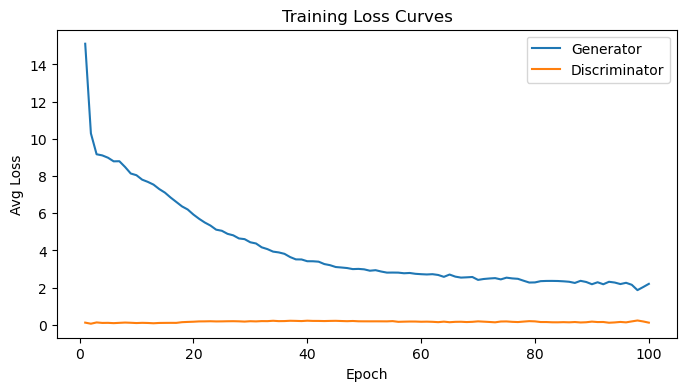

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


def down_block(in_c, out_c, norm=True):
    layers = [nn.Conv2d(in_c, out_c, 4, 2, 1, bias=False)]
    if norm:
        layers.append(nn.BatchNorm2d(out_c))
    layers.append(nn.LeakyReLU(0.2, inplace=True))
    return nn.Sequential(*layers)

def up_block(in_c, out_c, dropout=0.0):
    layers = [
        nn.ConvTranspose2d(in_c, out_c, 4, 2, 1, bias=False),
        nn.BatchNorm2d(out_c),
        nn.ReLU(inplace=True)
    ]
    if dropout:
        layers.append(nn.Dropout(dropout))
    return nn.Sequential(*layers)

class UNetGenerator(nn.Module):
    def __init__(self, in_ch=1, out_ch=1):
        super().__init__()
        self.downs = nn.ModuleList([
            down_block(in_ch, 64, norm=False), down_block(64,128),
            down_block(128,256), down_block(256,512), down_block(512,512),
            down_block(512,512), down_block(512,512), down_block(512,512)
        ])
        self.ups = nn.ModuleList([
            up_block(512,512,0.5), up_block(1024,512,0.5), up_block(1024,512,0.5),
            up_block(1024,512), up_block(1024,256), up_block(512,128), up_block(256,64)
        ])
        self.final = nn.Sequential(nn.ConvTranspose2d(128,out_ch,4,2,1), nn.Tanh())

    def forward(self, x):
        skips = []
        for d in self.downs:
            x = d(x)
            skips.append(x)
        skips = skips[::-1]
        for i, u in enumerate(self.ups):
            x = u(x)
            x = torch.cat([x, skips[i+1]], dim=1)
        return self.final(x)

class PatchDiscriminator(nn.Module):
    def __init__(self, in_ch=2):
        super().__init__()
        def block(ic, oc, norm=True):
            layers = [nn.Conv2d(ic, oc, 4, 2, 1)]
            if norm:
                layers.append(nn.BatchNorm2d(oc))
            layers.append(nn.LeakyReLU(0.2, inplace=True))
            return nn.Sequential(*layers)
        self.model = nn.Sequential(
            block(in_ch,   32, norm=False),
            block(32,      64),
            block(64,     128),
            block(128,    256),
            nn.ZeroPad2d((1, 0, 1, 0)),
            nn.Conv2d(256, 1, 4, 1, 1)
        )

    def forward(self, a, b):
        x = torch.cat([a, b], dim=1)
        return self.model(x)

# ----------------------------
# Training Setup
# ----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G = UNetGenerator().to(device)
D = PatchDiscriminator().to(device)
optG = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5,0.999))
optD = optim.Adam(D.parameters(), lr=1e-4, betas=(0.5,0.999))
adv_criterion = nn.MSELoss()
l1_criterion  = nn.L1Loss()
lambda_l1     = 50

epoch_G_losses, epoch_D_losses = [], []
num_epochs = 100
for epoch in range(1, num_epochs+1):
    eG, eD = 0.0, 0.0
    loop = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}", leave=False)
    for batch in loop:
        real_A = batch["A"].to(device)
        real_B = batch["B"].to(device)
        # Train Generator
        optG.zero_grad()
        fake_B = G(real_A)
        loss_G = adv_criterion(D(fake_B, real_A), torch.ones_like(D(fake_B, real_A))) + lambda_l1 * l1_criterion(fake_B, real_B)
        loss_G.backward()
        optG.step()
        # Train Discriminator
        optD.zero_grad()
        pred_real = D(real_B, real_A)
        pred_fake = D(fake_B.detach(), real_A)
        loss_D = 0.5 * (
            adv_criterion(pred_real, torch.ones_like(pred_real)) +
            adv_criterion(pred_fake, torch.zeros_like(pred_fake))
        )
        loss_D.backward()
        optD.step()
        eG += loss_G.item()
        eD += loss_D.item()
        loop.set_postfix(Loss_G=f"{loss_G.item():.3f}", Loss_D=f"{loss_D.item():.3f}")
    avgG = eG / len(train_loader)
    avgD = eD / len(train_loader)
    epoch_G_losses.append(avgG)
    epoch_D_losses.append(avgD)
    print(f"=> Epoch {epoch}: Avg Loss_G: {avgG:.4f}, Avg Loss_D: {avgD:.4f}")

# ----------------------------
# Plot Loss Curves
# ----------------------------
plt.figure(figsize=(8,4))
plt.plot(range(1, num_epochs+1), epoch_G_losses, label="Generator")
plt.plot(range(1, num_epochs+1), epoch_D_losses, label="Discriminator")
plt.xlabel("Epoch")
plt.ylabel("Avg Loss")
plt.legend()
plt.title("Training Loss Curves")
plt.show()
